# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-10.1.-Modeling-a-wave" data-toc-modified-id="Exercise-10.1.-Modeling-a-wave-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 10.1. Modeling a wave</a></div><div class="lev1 toc-item"><a href="#Exercise-10.2.-Modeling-population-growth" data-toc-modified-id="Exercise-10.2.-Modeling-population-growth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 10.2. Modeling population growth</a></div><div class="lev1 toc-item"><a href="#Exercise-10.3.-Galileo’s-experiment" data-toc-modified-id="Exercise-10.3.-Galileo’s-experiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 10.3. Galileo’s experiment</a></div><div class="lev1 toc-item"><a href="#Exercise-10.4.-Moore's-law" data-toc-modified-id="Exercise-10.4.-Moore's-law-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 10.4. Moore's law</a></div><div class="lev1 toc-item"><a href="#Exercise-10.5.-Ohm's-law" data-toc-modified-id="Exercise-10.5.-Ohm's-law-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 10.5. Ohm's law</a></div><div class="lev1 toc-item"><a href="#Exercise-10.6.-Modeling-multiple-waves" data-toc-modified-id="Exercise-10.6.-Modeling-multiple-waves-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 10.6. Modeling multiple waves</a></div><div class="lev1 toc-item"><a href="#Exercise-10.7.-An-elliptical-decision-boundary" data-toc-modified-id="Exercise-10.7.-An-elliptical-decision-boundary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 10.7. An elliptical decision boundary</a></div><div class="lev1 toc-item"><a href="#Exercise-10.8.-Engineering-features-for-a-two-class-classification-dataset" data-toc-modified-id="Exercise-10.8.-Engineering-features-for-a-two-class-classification-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 10.8. Engineering features for a two-class classification dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-10.9.-A-circular-manifold" data-toc-modified-id="Exercise-10.9.-A-circular-manifold-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 10.9. A circular manifold</a></div><div class="lev1 toc-item"><a href="#Exercise-10.10.-Another-nonlinear-extension-of-PCA" data-toc-modified-id="Exercise-10.10.-Another-nonlinear-extension-of-PCA-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 10.10. Another nonlinear extension of PCA</a></div><div class="lev1 toc-item"><a href="#Exercise-10.11.-A-nonlinear-extension-of-K-means" data-toc-modified-id="Exercise-10.11.-A-nonlinear-extension-of-K-means-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exercise 10.11. A nonlinear extension of K-means</a></div><div class="lev1 toc-item"><a href="#Extra:-Elliptical-boundaries" data-toc-modified-id="Extra:-Elliptical-boundaries-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Extra: Elliptical boundaries</a></div><div class="lev1 toc-item"><a href="#Extra:-Determining-the-orbit-of-celestial-bodies" data-toc-modified-id="Extra:-Determining-the-orbit-of-celestial-bodies-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Extra: Determining the orbit of celestial bodies</a></div>

In [1]:
# import basic libraries and autograd wrapped numpy
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import autograd.numpy as np
from datetime import datetime 
import copy
datapath = '../mlrefined_datasets/nonlinear_superlearn_datasets/'

# imports from custom library
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import unsupervised_library as unlib

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
optimizers = optlib.optimizers

# demos for this notebook
plotter = superlearn.multi_outupt_plotters

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 10.1. Modeling a wave

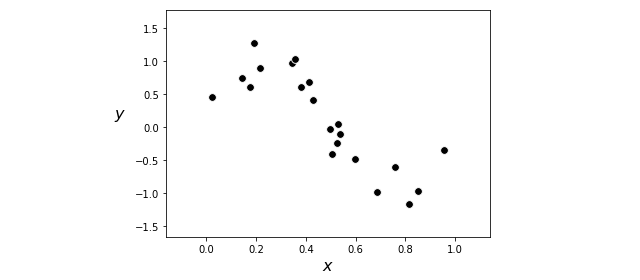

In [2]:
# load data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')

# load input/output data
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = regress_plotter.Visualizer(data)
demo.plot_data()

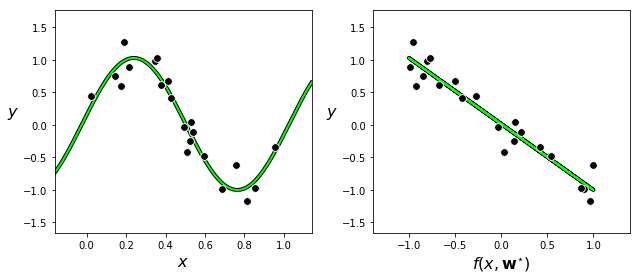

In [3]:
# the feature transformation from Example 2 
def feature_transforms(x,w):
    # calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T
    return f

# parameters for our two runs of gradient descent
w = np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])
max_its = 500; alpha_choice = 10**(-1)

# run on original data
run1 = nonlib.basic_runner.Setup(x,y,feature_transforms,'least_squares',normalize = 'None')
run1.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)

# run on normalized data
run2 = nonlib.basic_runner.Setup(x,y,feature_transforms,'least_squares',normalize = 'standard')
run2.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = np.argmin(run2.cost_history)
w_best = run2.weight_history[ind]

# plot data and fit in original and feature transformed space
demo.plot_fit_and_feature_space(w_best,run2.model,run2.feature_transforms,normalizer = run2.normalizer)

# Exercise 10.2. Modeling population growth

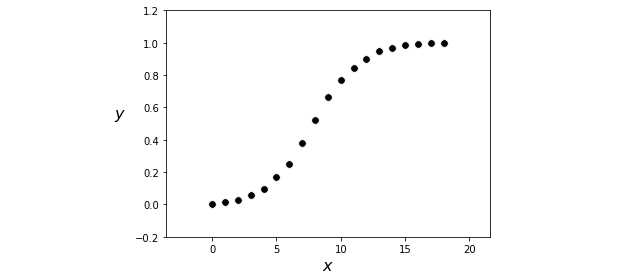

In [5]:
# load data
csvname = datapath + 'yeast.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 
y -= np.min(y)
y /= np.max(y)

# plot dataset
demo = regress_plotter.Visualizer(data)
demo.plot_data()

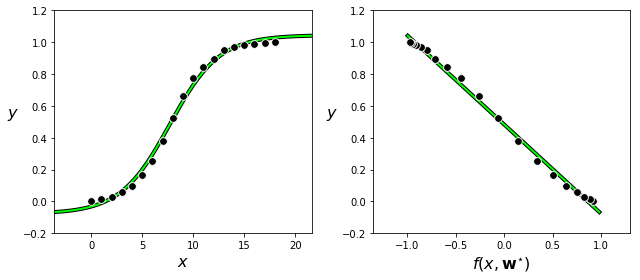

In [6]:
# parameters for our two runs of gradient descent
w = np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])
max_its = 1000; alpha_choice = 10**(-1);

# our nonlinearity, known as a feature transformation
def feature_transforms(x,w):
    # calculate feature transform
    f = np.tanh(w[0] + np.dot(x.T,w[1:])).T
    return f

# run on original data
run1 = nonlib.basic_runner.Setup(x,y,feature_transforms,'least_squares',normalize = 'standard')
run1.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)

# plot the cost function history for a given run
#static_plotter.plot_cost_histories([run1.cost_history],start = 0,points = False,labels = ['normalized'])

# plot data and fit in original and feature transformed space
ind = np.argmin(run1.cost_history)
w_best = run1.weight_history[ind]
demo.plot_fit_and_feature_space(w_best,run1.model,run1.feature_transforms,normalizer = run1.normalizer)

# Exercise 10.3. Galileo’s experiment

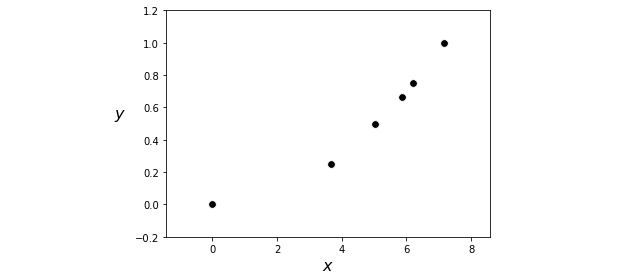

In [7]:
# load data
csvname = datapath + 'galileo_ramp_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = regress_plotter.Visualizer(data)
demo.plot_data()

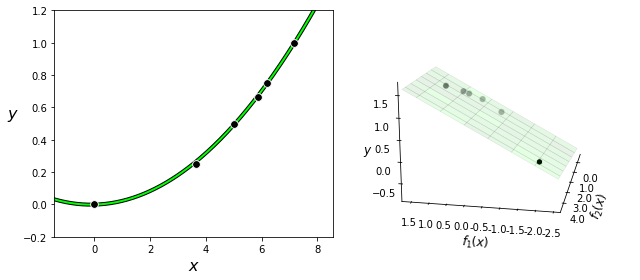

In [8]:
# parameters for our two runs of gradient descent
w = 0.1*np.random.randn(3,1);
max_its = 50; alpha_choice = 10**(-1);

# feature transform 
def feature_transforms(x):
    # calculate feature transform
    f = np.array([(x.flatten()**d) for d in range(1,3)])   
    return f

# run on original data
run1 = nonlib.basic_runner.Setup(x,y,feature_transforms,'least_squares',normalize = 'standard')
run1.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)

# plot data and fit in original and feature transformed space
ind = np.argmin(run1.cost_history)
w_best = run1.weight_history[ind]
demo.plot_fit_and_feature_space(w_best,run1.model,run1.feature_transforms,normalizer = run1.normalizer,view = [25,100])

# Exercise 10.4. Moore's law

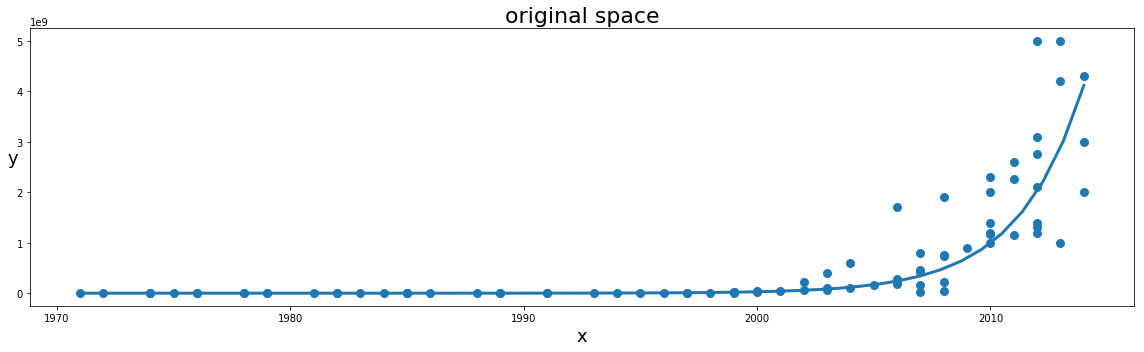

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# import the dataset
csvname = datapath + 'transistor_counts.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# transform output
y_logged = np.log(y)

# pad with ones -- > to setup linear system
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

# # set up linear system to solve for weights
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += y_logged[i]*x_new[i,:].T

# solve linear system for weights
w = np.linalg.solve(A,b)

### plot data with sinusoidal fit in original space and corresponding linear fit in transformed feature space 
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,1,1)  # panel for original space

# plot data and fit
ax1.scatter(x,y,linewidth = 3)
s = np.linspace(np.min(x),np.max(x))
t = np.exp(w[0] + w[1]*s)
ax1.plot(s,t,linewidth = 3)
ax1.set_xlabel('x',fontsize =18)
ax1.set_ylabel('y',rotation = 0,fontsize = 18)
ax1.set_title('original space',fontsize = 22);

# Exercise 10.5. Ohm's law

Text(0,0.5,'y')

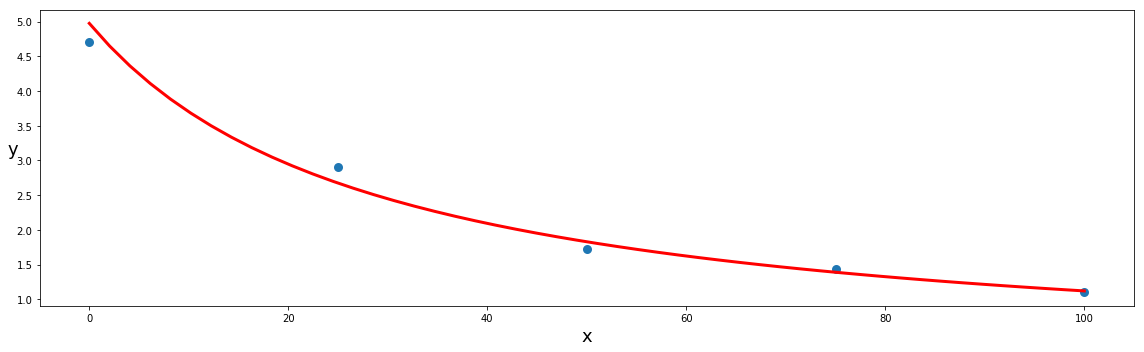

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

csvname = datapath + 'ohms_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# transform output
y_transformed = [1/s for s in y]

# pad with ones -- > to setup linear system
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

# # set up linear system to solve for weights
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += y_transformed[i]*x_new[i,:].T

# solve linear system for weights
w = np.linalg.solve(A,b)

### plot data with sinusoidal fit in original space and corresponding linear fit in transformed feature space 
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,1,1)  # panel for original space

# plot data and fit
ax1.scatter(x,y,linewidth = 3)
s = np.linspace(np.min(x),np.max(x))
t = w[0] + w[1]*s
t = [1/r for r in t]
ax1.plot(s,t,linewidth = 3,color = 'r')
ax1.set_xlabel('x',fontsize =18)
ax1.set_ylabel('y',rotation = 0,fontsize = 18)

# Exercise 10.6. Modeling multiple waves

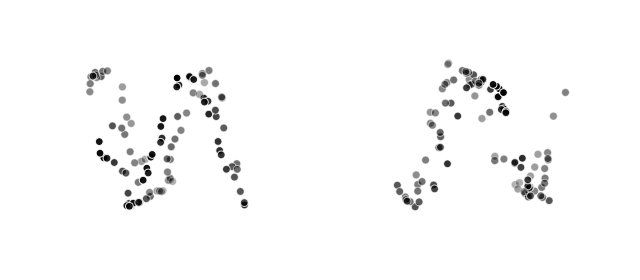

In [11]:
## This code cell will not be shown in the HTML version of this notebook
csvname = datapath + 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

# plot
plotter.plot_data(x,y,view1 = [6,-10],view2 = [11,-62])

To model both regressions simultaneously we will use $B = 2$ parameterized sinusoidal feature transformations

\begin{equation}
\begin{array}
\
f_1\left(\mathbf{x}\right) = \text{sin}\left(w_{1,0} + w_{1,1}x_1 + w_{1,2}x_2\right) \\
f_2\left(\mathbf{x}\right) = \text{sin}\left(w_{2,0} + w_{2,1}x_1 + w_{2,2}x_2\right) \\
\end{array}
\end{equation}

Fitting this set of nonlinear features jointly to both regression problems above (using gradient descent) results in the fits shown below - both of which are quite good.

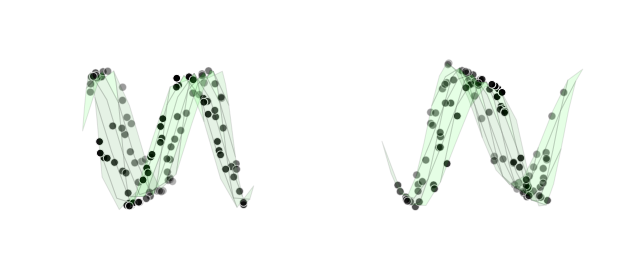

In [13]:
## This code cell will not be shown in the HTML version of this notebook
import autograd.numpy as np

# feature transformation
def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

# an implementation of our model employing a nonlinear feature transformation
def model(x,w):    
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

# an implementation of the least squares cost function for linear regression
def least_squares(w):    
    # compute the least squares cost
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

# setup and run optimization
g = least_squares; 
num_feats = 2
scale = 1
w = [scale*np.random.randn(3,num_feats), scale*np.random.randn(num_feats + 1,2)]
max_its = 2000;
alpha_choice = 10**(0);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# # plot history
# static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = ['run 1'])

# determine best weights - based on lowest cost value attained
ind = np.argmin(cost_history)
w_best = weight_history[ind]

# form predictor
predictor = lambda x: model(x,w_best)

# plot data with predictions
plotter.plot_regressions(x,y,predictor,view1 = [6,-10],view2 = [11,-62])

# Exercise 10.7. An elliptical decision boundary

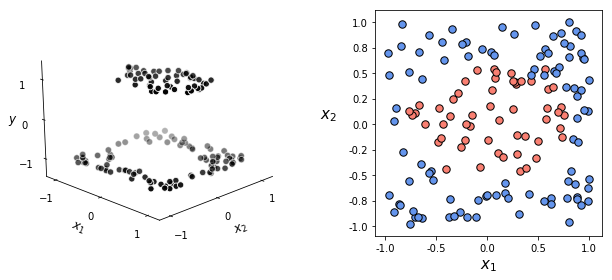

In [14]:
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'ellipse_2class_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data();

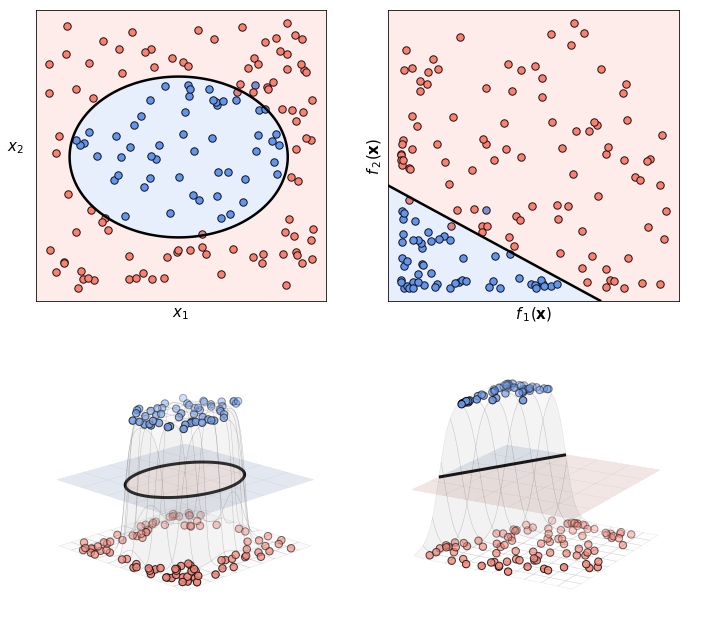

In [15]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = x**2  
    return f

# parameters for our two runs of gradient descent
w = 0.1*np.random.randn(3,1); max_its = 1000; alpha_choice = 10**(0)

# run on normalized data
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'softmax',normalize = 'none')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# illustrate results
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.static_N2_img(w_best,run,view1 = [20,45],view2 = [20,30])

# Exercise 10.8. Engineering features for a two-class classification dataset

In this example we look to perform two-class classification on the dataset shown below - from the regression perspective (left panel) and separator perspective (right panel).  This interesting looking dataset consists of two classes that are separated into consecutive diagonal stripes.

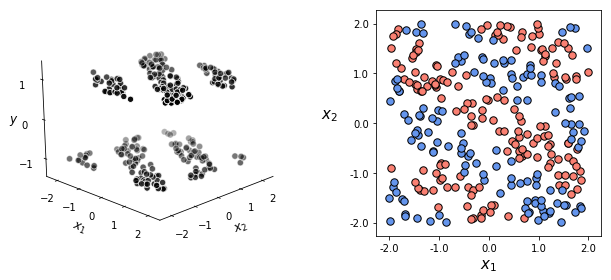

In [16]:
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'diagonal_stripes.csv')

# load in input/output data
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data();

Looking at this dataset from the regression perspective (left panel above) it looks like a properly designed sinusoid of the input could potentially fit it well, and hence provide the proper sort of nonlinear boundary we need.  So we will employ a `model` consisting of completely *parameterized* sine function or *feature transformation* of the input

\begin{equation}
f\left(\mathbf{x},\mathbf{w}\right) = \text{sin}\left(w_0 + x_1w_1 + x_2w_2\right).
\end{equation}

We can then take as our model a linear combination of this nonlinear feature transformation as

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}_{\!}\right) = w_3 + f\left(\mathbf{x},\mathbf{w}\right)w_{4\,}.
\end{equation}

Note here we are using the notation $\mathbf{w}$ rather loosely to represent whatever weights are present in the respective formula - for example in the feature transformation $\mathbf{w}$ consists of $w_0$, $w_1$, and $w_2$, whereas with the `model` it contains these weights as well as $w_3$ and $w_4$.

We implement this parameterized feature transformation in `Python` below.

In [17]:
# our nonlinearity, known as a feature transformation
def feature_transforms(x,w):        
    f = np.sin(w[0] + np.dot((x).T,w[1:])).T
    return f

With our feature transformation implemented we now tune all weights of the model by taking 1000 gradient descent steps, using standard normalization on the input.

Now we illustrate the nonlinear step function (left panel) and corresponding decision boundary (right panel) created by taking the weights associated with the lowest cost value of our gradient descent run above.  We can see that - with properly tuned weights - we achieve perfect classification on this dataset.  Note in this particular instance we had to run gradient descent a number of times to produce these results. 

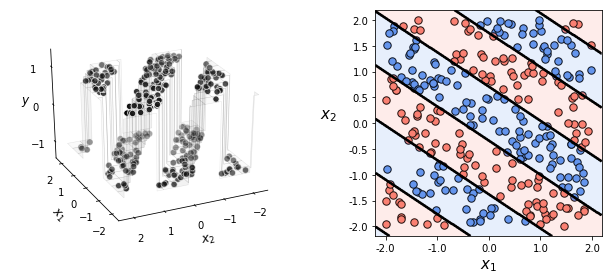

In [18]:
## This code cell will not be shown in the HTML version of this notebook
# parameters for our two runs of gradient descent
scale = 2
w = [scale*np.random.randn(3,1),scale*np.random.randn(2,1)]
max_its = 1000; alpha_choice = 10**(-1)

# run on normalized data
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# illustrate results
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.static_N2_simple(w_best,run,view = [30,155])

# Exercise 10.9. A circular manifold

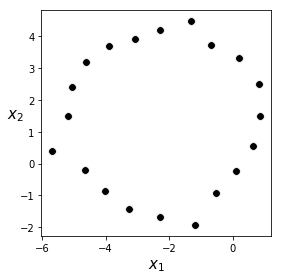

In [19]:
# import data
datapath1 = '../mlrefined_datasets/unsuperlearn_datasets/'
X = np.loadtxt(datapath1 + 'circle_data.csv',delimiter=',')

# scatter dataset
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
plt.show()

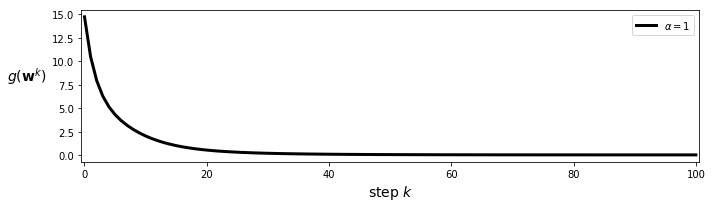

In [20]:
# custom arctan function
def my_arctan(x1,x2):
    v = x2/x1
    if x1 > 0:
        return np.arctan(v)
    elif x1 < 0 and x2 >= 0:
        return np.arctan(v) + np.pi
    elif x1 < 0 and x2 < 0:
        return np.arctan(v) - np.pi
    elif x1==0 and x2 > 0:
        return np.pi*0.5
    elif x1==0 and x2 < 0:
        return -np.pi*0.5  
    
### autoencoder functionality ###
# autoencoder 
def autoencoder(w):
    cost = np.sum((model(X,w) - X)**2)
    return cost/float(X.shape[1])

# a general model wrapping up our encoder/decoder
def model(X,w):
    # encode the input
    v = encoder(X,w[0])
    
    # decode the encoding
    a = decoder(v,w[1])
    return a

# encoder
def encoder(x,w):
    a = x - w     
    b = []
    for i in range(a.shape[1]):
        b.append(my_arctan(a[0][i],a[1][i]))
    b = np.array(b)[np.newaxis,:]
    return b  

# decoder
def decoder(v,w):
    a = w[:,0][:,np.newaxis]*np.vstack((np.cos(v),np.sin(v))) + w[:,1][:,np.newaxis]
    return a

# optimize
scale = 0.1
w = [scale*np.random.randn(2,1),scale*np.random.randn(2,2)];

# tune pca least squares cost
g = autoencoder;

# tune pca least squares cost
alpha_choice = 10**(-1); max_its = 100; 
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = [r'$\alpha = 1$'])

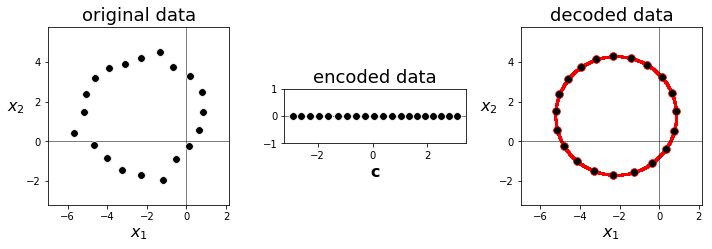

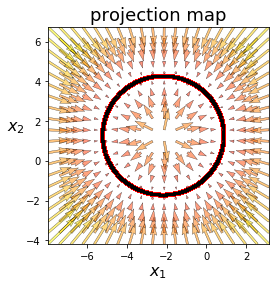

In [21]:
# plot results
unlib.autoencoder_demos.show_encode_decode(X,cost_history,weight_history,encoder=encoder,decoder=decoder,show_pc = False,scale = 55,encode_label = r'$\mathbf{c}$',projmap = True)

# Exercise 10.10. Another nonlinear extension of PCA

**a)**  All of the details of the classical PCA solution in this instance remains *unchanged* - only our *data matrix* changes from the $N\times P$ matrix $\mathbf{X}$, whose $p^{th}$ column contains the $N$ dimensional input point $\mathbf{x}_p$, to a *data matrix* $\mathbf{F}$ of size $B\times P$ whose $p^{th}$ column is $\mathbf{f}_p$.

**b)**  In complete analogy to what we saw in this Chapter with respect to regression and classification, this nonlinear feature transformation will carve out a *circular* manifold in the original data space, and a *linear* one in the feature transformed space (that space whose axes are defined by $f_1\left(\mathbf{x}\right)$ and $f_2\left(\mathbf{x}\right)$, respectiveliy.

# Exercise 10.11. A nonlinear extension of K-means

**a)**   Everything about the K-means algorithm *remains the same*.  We simply transform each input $\mathbf{x}_p$ to a feature transformed version $\mathbf{f}_p$ *first*.  Now what is being clustered are these transformed datapoints $\mathbf{f}_p$.

**b)**  In complete analogy to part **b)** of the previous exericse, here in the *orignal space* our clusters will be *two concentric circles*, while in the *transformed feature space* typical globular clusters are determined simulatneously.

# Extra: Elliptical boundaries

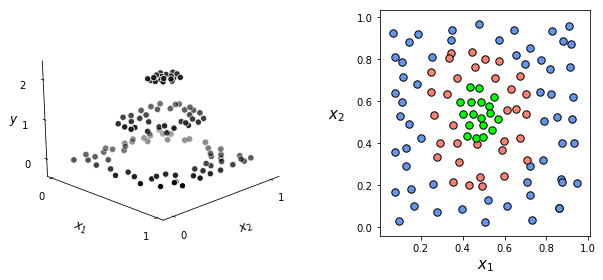

In [56]:
# create instance of a multiclass classification visualizer
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '3_layercake_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data();

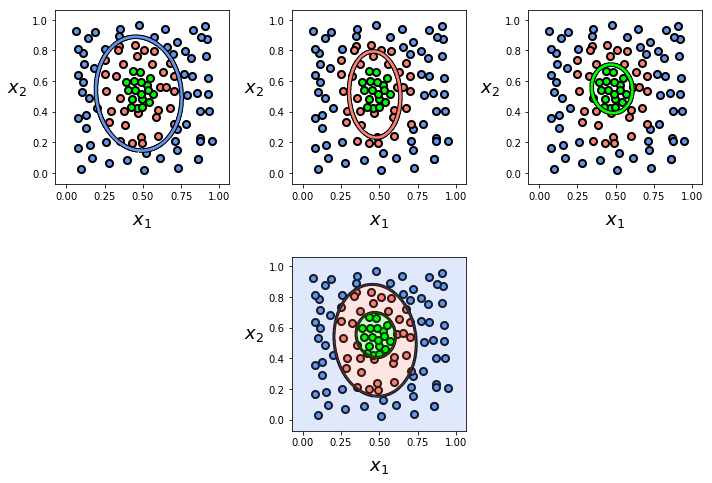

In [57]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = []
    for i in range(0,D):
        for j in range(0,D-i):
            if i > 0 or j > 0:
                term = (x[0,:]**i)*((x[1,:])**j)
                f.append(term)
    return np.array(f)

# run one versus all
max_its = 1500; alpha_choice = 10**(0); w = 0.1*np.random.randn(6,1); D = 3;
combined_weights, count_history = nonlib.one_versus_all.train(x,y,feature_transforms,alpha_choice = alpha_choice,max_its = max_its,w = w)

# draw resulting nonlinear boundaries for each classification problem, as well as the
# entire multiclass boundary
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'multiclass_counter',normalize = 'standard')
w_best = combined_weights[-1]
demo.show_individual_classifiers(run,w_best)

# Extra: Determining the orbit of celestial bodies

<IPython.core.display.Javascript object>


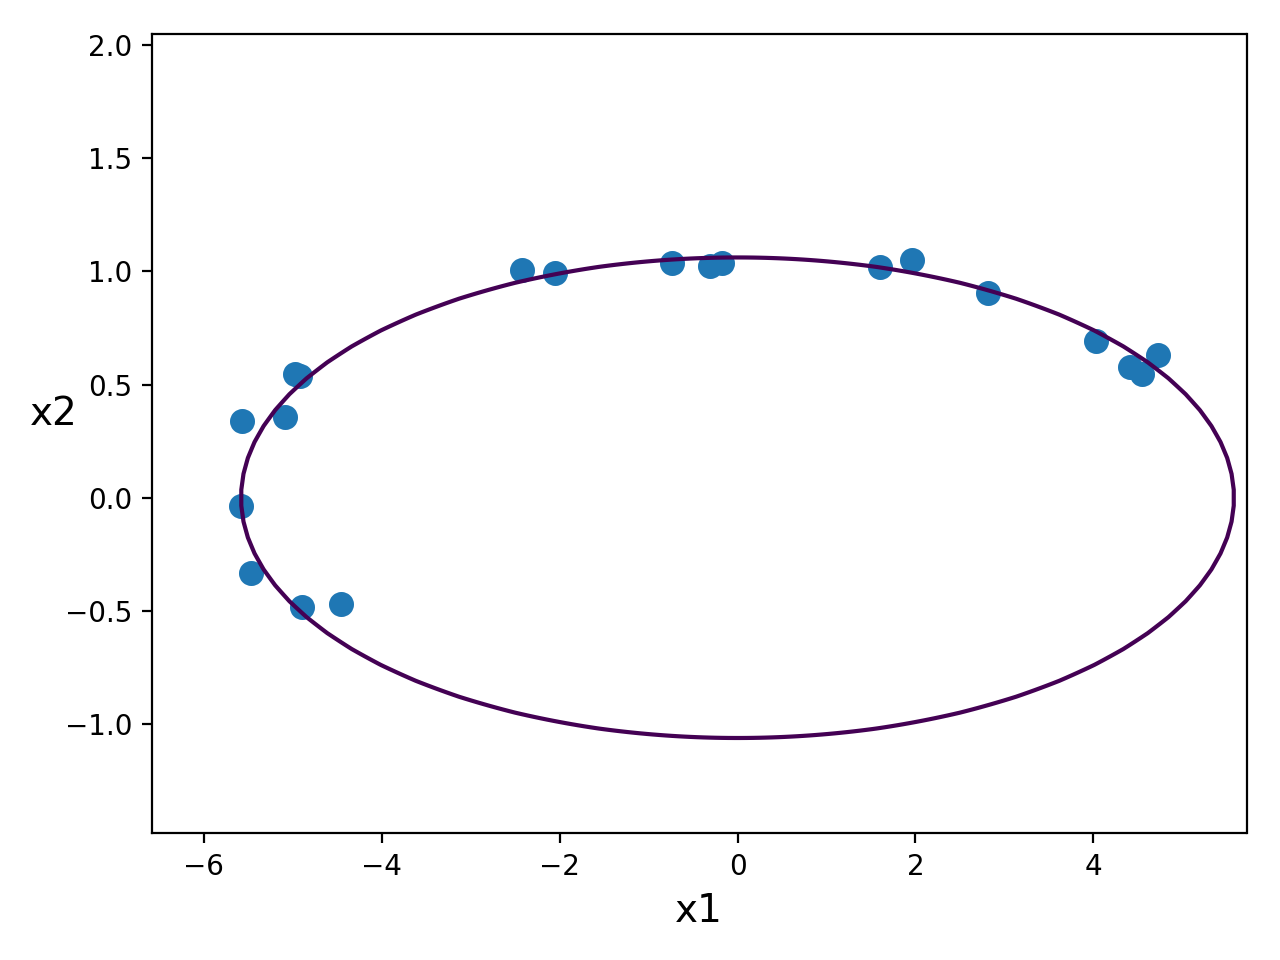

(array([-1.48341]), array([2.0512]))

In [2]:
# import the dataset
csvname = datapath + 'asteroid_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# transform input and ouptut
x_transformed = [s*s for s in x]
y_transformed = [s*s for s in y]

# pad with ones -- > to setup linear system
o = np.ones((len(x),1))
x_new = np.concatenate((x_transformed,y_transformed),axis = 1)

# # set up linear system to solve for weights
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += o[i]*x_new[i,:].T

# solve linear system for weights
w = np.linalg.solve(A,b)

# plot data and fit - here we use matplotlib's contour function to get the elliptical fit right in the plot
plt.scatter(x,y,linewidth = 3)
s = np.linspace(-7,7,200)
e,r = np.meshgrid(s,s)
z = e*e*w[0] + r*r*w[1] - 1
plt.contour(e,r,z,levels = [0])

# clean up plot
plt.xlabel('x1',fontsize =14)
plt.ylabel('x2',rotation = 0,fontsize = 14)
plt.xlim([min(x)-1,max(x)+1])
plt.ylim([min(y)-1,max(y)+1])